In [2]:
!git clone https://github.com/mehulrastogi/Hill-Climbing-3SAT
import os
os.chdir("./Hill-Climbing-3SAT")

Cloning into 'Hill-Climbing-3SAT'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 0), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [0]:
from walk_sat import walkSAT
from generate_3SAT import CNF
import sys
import time

In [0]:
CNF(5,5,3).clauses[0].lits

[-1, -2, -5]

In [0]:
n = 8
m = 3
prob = 0.5
max_flips = 1001

clauses = [CNF(n,m,3).clauses[i].lits for i in range(m)]
print(clauses)
walkSAT(clauses,n,m,prob,max_flips)

[[-1, -7, -8], [-3, -1, 6], [-5, 7, 8]]
[0, -1, 2, -3, -4, 5, 6, -7, 8]
[1, 1, 1]
True


(True, [0, -1, 2, -3, -4, 5, 6, -7, 8], 0)

In [0]:
import runSat
from runSat import run_sat,parse
from generate_3SAT import CNF
n = 50
m = 115

CNF(n,m,3).write("test.txt" )

# !python3 generate_3SAT.py $n $m 3 > cnf.txt

clauses, n_vars, lit_clause = parse("./test.txt")

satisfiable,solution,time_iter = run_sat(clauses, n_vars, lit_clause)

print(clauses)
print(time)
print(solution)
satisfiable

[[-30, 27, 37], [20, -9, -4], [-16, -39, -50], [10, -29, -20], [36, 39, 10], [40, 48, 32], [-8, -5, 43], [37, -10, 8], [-5, -47, 38], [5, -3, 21], [-49, -39, -26], [-38, -4, -31], [46, -50, -34], [-6, 27, 21], [24, 30, 32], [49, -35, -27], [-37, -30, 6], [47, 12, -23], [48, 49, 4], [-1, 6, -13], [-11, -24, 36], [19, -46, 44], [41, 49, 6], [26, 32, -47], [21, 24, 14], [28, 34, -25], [12, 40, 36], [7, -13, 43], [34, 28, 38], [33, -39, -48], [-27, 5, 18], [6, 20, -8], [-27, 16, -3], [-1, -41, 49], [-46, 39, 2], [-36, -35, -7], [-6, -17, 2], [-17, 13, 49], [31, -22, -13], [-25, 43, 29], [8, 25, -13], [19, -40, -21], [34, -30, 41], [43, -16, -7], [26, -21, 6], [34, -42, 28], [-11, 14, -22], [-36, -5, -26], [-40, -24, -13], [-41, -40, -16], [41, 36, -25], [40, 11, 13], [-9, 32, 29], [-31, -43, 37], [-13, -48, -37], [16, -14, -47], [-30, -11, 28], [24, -48, 40], [-18, -39, 27], [-29, 31, -30], [-15, -19, -5], [45, -28, 11], [7, 2, -6], [-2, -36, 34], [45, -20, -23], [18, -39, -5], [-43, 3, 22

True

In [0]:
# FIRST N
from runSat import run_sat,parse
n = 50
prob = 0.5
time_list =[]
real_time_list = []
m_list = []

for m in range(3*n , 5*n +1 ):
    CNF(n,m,3).write("test.txt" )
    start = time.time()
    clauses, n_vars, lit_clause = parse("./test.txt")
    satisfiable,solution,iter_time = run_sat(clauses, n_vars, lit_clause)
    end = time.time()
    
    
    
    iter_real_time = end - start
    if satisfiable:
        solution = solution[1:]
        print(satisfiable,solution,(m/float(n)))
        time_list.append(iter_time)
        real_time_list.append(iter_real_time)
        m_list.append(m/float(n))
    print("-"*20)

print(time_list)

(True, [1, 2, -3, 4, -5, 6, 7, 8, 9, -10, -11, 12, 13, -14, 15, -16, 17, -18, -19, -20, 21, 22, 23, 24, 25, 26, -27, -28, -29, -30, 31, -32, -33, -34, -35, 36, -37, 38, 39, 40, -41, -42, -43, -44, -45, -46, 47, -48, 49, 50], 3.0)
--------------------
(True, [-1, 2, -3, 4, 5, -6, 7, 8, -9, -10, 11, 12, 13, -14, 15, -16, -17, -18, -19, -20, 21, 22, -23, 24, 25, 26, 27, -28, -29, -30, -31, -32, -33, 34, -35, -36, 37, 38, -39, -40, 41, 42, 43, 44, 45, -46, 47, -48, -49, 50], 3.02)
--------------------
(True, [1, 2, 3, 4, -5, 6, 7, -8, 9, -10, 11, 12, -13, -14, 15, -16, 17, -18, 19, 20, 21, -22, -23, -24, -25, -26, 27, -28, -29, -30, -31, 32, 33, 34, -35, -36, -37, 38, -39, 40, -41, 42, 43, 44, 45, -46, 47, 48, -49, 50], 3.04)
--------------------
(True, [-1, 2, -3, -4, 5, -6, -7, -8, 9, 10, 11, 12, -13, 14, -15, 16, -17, -18, -19, 20, 21, -22, 23, 24, -25, -26, 27, 28, -29, 30, 31, -32, 33, -34, -35, -36, 37, 38, 39, 40, 41, -42, 43, -44, 45, -46, -47, -48, 49, -50], 3.06)
----------------

--------------------
--------------------
(True, [-1, 2, -3, -4, -5, 6, 7, -8, 9, -10, -11, -12, -13, 14, -15, 16, -17, -18, 19, -20, -21, -22, 23, -24, -25, 26, 27, -28, 29, -30, -31, 32, -33, 34, 35, 36, -37, -38, 39, -40, -41, 42, 43, -44, -45, 46, 47, -48, 49, -50], 3.84)
--------------------
--------------------
--------------------
(True, [1, -2, 3, 4, 5, 6, -7, -8, 9, -10, -11, 12, -13, -14, 15, 16, 17, 18, -19, -20, -21, -22, 23, -24, 25, 26, -27, 28, 29, 30, 31, 32, 33, -34, 35, -36, -37, -38, 39, 40, -41, 42, -43, -44, 45, 46, -47, -48, 49, -50], 3.9)
--------------------
--------------------
(True, [1, -2, -3, 4, 5, -6, -7, -8, 9, 10, -11, -12, -13, -14, -15, 16, -17, -18, 19, 20, -21, -22, -23, -24, -25, 26, 27, 28, 29, 30, 31, 32, -33, 34, -35, 36, 37, -38, 39, 40, 41, -42, 43, -44, -45, 46, 47, -48, 49, -50], 3.94)
--------------------
(True, [-1, 2, 3, -4, 5, -6, 7, -8, 9, -10, 11, -12, 13, -14, -15, 16, -17, -18, -19, 20, -21, -22, -23, 24, -25, -26, -27, 28, -29, -30, 

In [0]:
import matplotlib.pyplot as plt



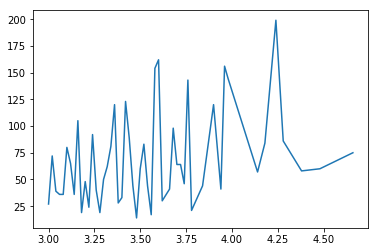

In [0]:
plt.plot(m_list , time_list)
plt.show()

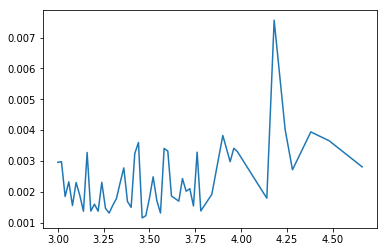

In [0]:
plt.plot(m_list , real_time_list)
plt.show()

SIMULATING FOR N= 20


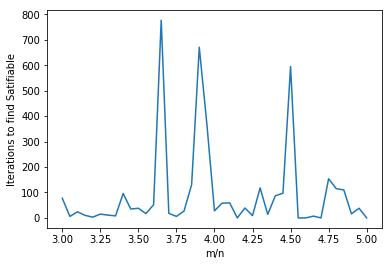

--------------------
SIMULATING FOR N= 30


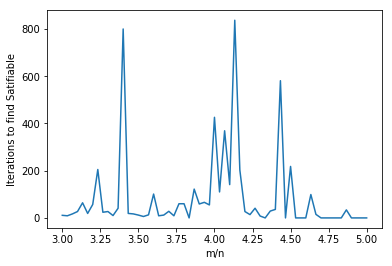

--------------------
SIMULATING FOR N= 40


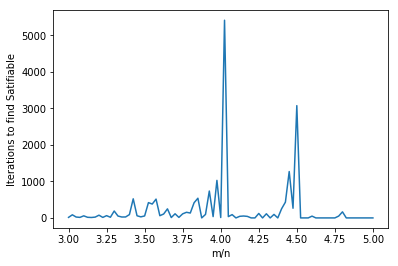

--------------------
SIMULATING FOR N= 50


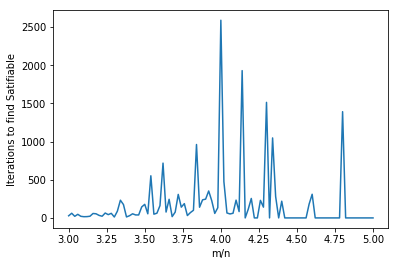

--------------------
SIMULATING FOR N= 60


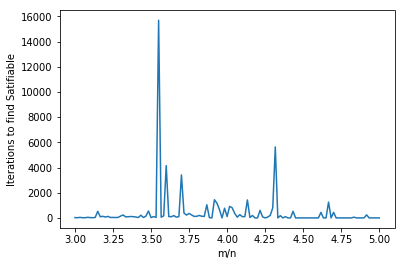

--------------------
SIMULATING FOR N= 70


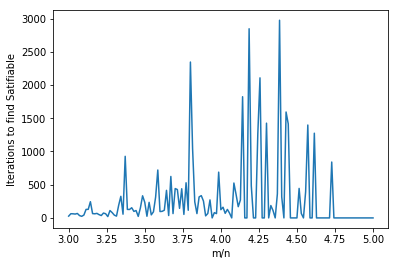

--------------------
SIMULATING FOR N= 80


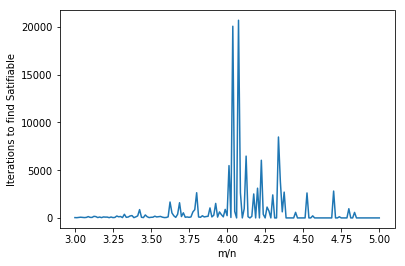

--------------------
SIMULATING FOR N= 90


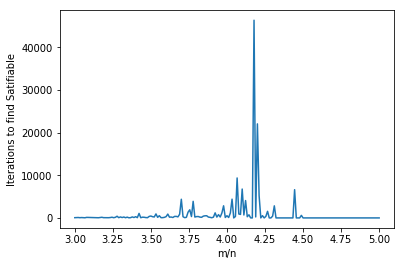

--------------------


In [4]:
import runSat
from runSat import run_sat,parse
from generate_3SAT import CNF
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

master_m_n = []
runs_per_params = 1
max_flips = 100000

for i in range(20,100,10):
    print("SIMULATING FOR N=",i)
    n = i
    time_list =[]
    real_time_list = []
    m_list = []

    for m in range(3*n , 5*n +1 ):
        avg_iter_time_list = []
        avg_iter_real_time_list = []
        for i in range(runs_per_params):
            
            CNF(n,m,3).write("test.txt" )
            start = time.time()
            clauses, n_vars, lit_clause = parse("./test.txt")
            satisfiable,solution,iter_time = run_sat(clauses, n_vars, lit_clause,max_flips)
            #print(satisfiable)
            end = time.time()
            iter_real_time = end - start
            if(satisfiable|True):
                avg_iter_time_list.append(iter_time)
                #print(iter_time)
                avg_iter_real_time_list.append(iter_real_time)
                #solution = solution[1:]
        
        
        
        if len(avg_iter_time_list)!=0:
            #print("length ",len(avg_iter_time_list),solution)
            avg_iter_time = np.median(np.asarray(avg_iter_time_list))#sum(avg_iter_time_list) / (len(avg_iter_time_list))
            avg_iter_real_time = np.median(np.asarray(avg_iter_real_time_list))#sum(avg_iter_real_time_list) / (len(avg_iter_real_time_list))
            
            #print(satisfiable,solution,(m/float(n)))
            time_list.append(avg_iter_time)
            real_time_list.append(avg_iter_real_time)
            m_list.append(m/float(n))
            
        else:
            time_list.append(avg_iter_time)
            real_time_list.append(avg_iter_real_time)
            m_list.append(m/float(n))
            
    
    
    
    plt.plot(m_list , time_list)
    plt.xlabel("m/n")
    plt.ylabel("Iterations to find Satifiable")
    plt.show()
    
    
#     plt.plot(m_list , real_time_list)
#     plt.xlabel("m/n")
#     plt.ylabel("Real time to find satifiable")
#     plt.show()
    print("-"*20)
        
        

    

SIMULATING FOR N= 20


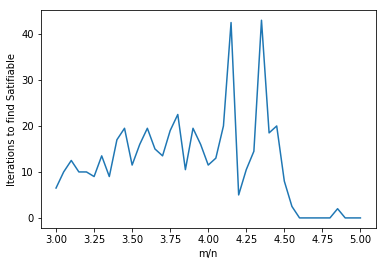

--------------------
SIMULATING FOR N= 30


In [0]:
import runSat
from runSat import run_sat,parse
from generate_3SAT import CNF
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

master_m_n = []
runs_per_params = 30
max_flips = 100000

for i in range(20,100,10):
    print("SIMULATING FOR N=",i)
    n = i
    time_list =[]
    real_time_list = []
    m_list = []

    for m in range(3*n , 5*n +1 ):
        avg_iter_time_list = []
        avg_iter_real_time_list = []
        for i in range(runs_per_params):
            
            CNF(n,m,3).write("test.txt" )
            start = time.time()
            clauses, n_vars, lit_clause = parse("./test.txt")
            satisfiable,solution,iter_time = run_sat(clauses, n_vars, lit_clause,max_flips)
            #print(satisfiable)
            end = time.time()
            iter_real_time = end - start
            if(satisfiable|True):
                avg_iter_time_list.append(iter_time)
                #print(iter_time)
                avg_iter_real_time_list.append(iter_real_time)
                #solution = solution[1:]
        
        
        
        if len(avg_iter_time_list)!=0:
            #print("length ",len(avg_iter_time_list),solution)
            avg_iter_time = np.median(np.asarray(avg_iter_time_list))#sum(avg_iter_time_list) / (len(avg_iter_time_list))
            avg_iter_real_time = np.median(np.asarray(avg_iter_real_time_list))#sum(avg_iter_real_time_list) / (len(avg_iter_real_time_list))
            
            #print(satisfiable,solution,(m/float(n)))
            time_list.append(avg_iter_time)
            real_time_list.append(avg_iter_real_time)
            m_list.append(m/float(n))
            
        else:
            time_list.append(avg_iter_time)
            real_time_list.append(avg_iter_real_time)
            m_list.append(m/float(n))
            
    
    
    
    plt.plot(m_list , time_list)
    plt.xlabel("m/n")
    plt.ylabel("Iterations to find Satifiable")
    plt.show()
    
    
#     plt.plot(m_list , real_time_list)
#     plt.xlabel("m/n")
#     plt.ylabel("Real time to find satifiable")
#     plt.show()
    print("-"*20)